In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

In [127]:
img_path = r'..\..\dataset\AgriculturalDisease\trainingset\images\0aef4e370cac63cb788fc3e061326dbd.jpg'
img_dir = r'../../dataset/AgriculturalDisease/testA/images'

In [28]:
paths = glob(img_dir+'\*')

In [29]:
for path in paths:
    img = Image.open(path)
    if sum(img.size) < 512:
        print(img)

In [128]:
# %%timeit
img = Image.open(img_path)

In [91]:
img.size

(296, 256)

In [92]:
img2 = img.resize([256, int(256/296*256)])

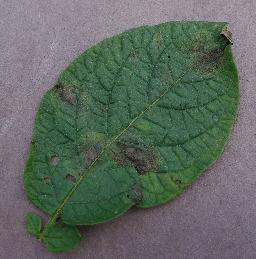

In [129]:
img

In [125]:
def _refine(self, img_data):
    ''' 经过检查，所有图片均长+宽均>=512，至少有一边是大于256的，对此进行缩放并做pad，
        img_data必须是pil的Image.open返回的对象，函数最终输出numpy数组 '''

    # resize到长边256
    w, h = img_data.size
    if w > h:
      nw, nh = 256, int(h * 256 / w)
    else:
      nw, nh = int(w * 256 / h), 256
    img_data = np.array(img_data.resize([nw, nh]))

    # pad到 256 x 256
    if w > h:
      p = 256 - nh
      img_data = np.pad(img_data, [[p, 0], [0, 0], [0, 0]], 'reflect')
    else:
      p = 256 - nw
      img_data = np.pad(img_data, [[0, 0], [p, 0], [0, 0]], 'reflect')
    
    return img_data